In [1]:
import os
import json
import random
from pathlib import Path
from zipfile import ZipFile
from PIL import Image

In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from classification_models.tfkeras import Classifiers

In [45]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

# from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [3]:
kaggle_data = json.load(open(str(Path.home()) + '/kaggle.json', 'r'))
KAGGLE_USERNAME = kaggle_data['username']
KAGGLE_KEY = kaggle_data['key']

In [4]:
if KAGGLE_KEY and KAGGLE_USERNAME: print('Successfully imported access to kaggle')

Successfully imported access to kaggle


In [5]:
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

In [6]:
print('Dataset will be downloaded as zip under the current directory')
!kaggle datasets download -d clorichel/boat-types-recognition

# url -> https://www.kaggle.com/lasaljaywardena/furniture-images-dataset?select=furniture_images

Dataset will be downloaded as zip under the current directory
boat-types-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip boat-types-recognition.zip -d images/

Archive:  boat-types-recognition.zip
  inflating: images/boats/buoy/alaska-ocean-warning-light-sea-2574393.jpg  
  inflating: images/boats/buoy/anchor-warp-rope-buoy-beach-2881563.jpg  
  inflating: images/boats/buoy/beach-buoy-w-water-sea-ocean-1042883.jpg  
  inflating: images/boats/buoy/beacon-lighthouse-coast-navigation-39232.jpg  
  inflating: images/boats/buoy/blue-boat-buoy-floating-2834157.jpg  
  inflating: images/boats/buoy/blue-buoy-float-navigation-ocean-20511.jpg  
  inflating: images/boats/buoy/boat-water-bird-beach-sand-2840152.jpg  
  inflating: images/boats/buoy/bojka-buoy-water-bojka-rescue-882679.jpg  
  inflating: images/boats/buoy/buoy-beach-sea-buoys-scenic-242727.jpg  
  inflating: images/boats/buoy/buoy-beacon-sea-beach-sand-2266571.jpg  
  inflating: images/boats/buoy/buoy-beacon-water-blue-yellow-1661196.jpg  
  inflating: images/boats/buoy/buoy-buoy-marker-ocean-sea-sea-buoy-tide-72044.jpg  
  inflating: images/boats/buoy/buoy-float-floating-device-lifebuoy-2

  inflating: images/boats/cruise ship/cruise-ship-cruiser-cruise-ship-1578528.jpg  
  inflating: images/boats/cruise ship/cruise-ship-cruiser-ship-cruise-vacation-295451.jpg  
  inflating: images/boats/cruise ship/cruise-ship-cruises-108974.jpg  
  inflating: images/boats/cruise ship/cruise-ship-disney-cruise-line-private-i-615116.jpg  
  inflating: images/boats/cruise ship/cruise-ship-dock-night-reflection-water--1156012.jpg  
  inflating: images/boats/cruise ship/cruise-ship-dock-vessel-boat-port-harbor-1146058.jpg  
  inflating: images/boats/cruise ship/cruise-ship-dock-vessel-boat-port-harbor-1396681.jpg  
  inflating: images/boats/cruise ship/cruise-ship-docked-cruise-ship-339328.jpg  
  inflating: images/boats/cruise ship/cruise-ship-elbe-hamburg-ship-3526709.jpg  
  inflating: images/boats/cruise ship/cruise-ship-holidays-cruise-290913.jpg  
  inflating: images/boats/cruise ship/cruise-ship-holidays-cruise-vacation-cru-114152.jpg  
  inflating: images/boats/cruise ship/cruise-sh

  inflating: images/boats/cruise ship/ship-boat-cruise-liner-harbor-port-76670.jpg  
  inflating: images/boats/cruise ship/ship-boat-cruise-vacation-ocean-vessel-t-29697.jpg  
  inflating: images/boats/cruise ship/ship-boat-sea-water-summer-travel-527528.jpg  
  inflating: images/boats/cruise ship/ship-boat-water-sea-port-aida-1578526.jpg  
  inflating: images/boats/cruise ship/ship-bug-create-dew-cruise-ship-3554711.jpg  
  inflating: images/boats/cruise ship/ship-bug-cruiser-cruise-ocean-3663.jpg  
  inflating: images/boats/cruise ship/ship-cruise-cruise-ship-vacations-2756487.jpg  
  inflating: images/boats/cruise ship/ship-cruise-cruise-ship-water-2462241.jpg  
  inflating: images/boats/cruise ship/ship-cruise-liner-cruiser-cruise-ship-fe-158287.jpg  
  inflating: images/boats/cruise ship/ship-cruise-maritime-1083559.jpg  
  inflating: images/boats/cruise ship/ship-cruise-ship-cruise-ship-travel-3579589.jpg  
  inflating: images/boats/cruise ship/ship-cruise-ship-cruise-vacations-3

  inflating: images/boats/ferry boat/ferry-ship-boat-sea-lake-water-1728842.jpg  
  inflating: images/boats/ferry boat/ferry-ship-boat-transport-357646.jpg  
  inflating: images/boats/ferry boat/ferry-ship-boat-water-sea-river-3418296.jpg  
  inflating: images/boats/ferry boat/ferry-ship-port-water-boat-cruise-3763312.jpg  
  inflating: images/boats/ferry boat/ferry-staten-island-new-york-manhattan-b-799428.jpg  
  inflating: images/boats/ferry boat/ferryboat-ferry-boat-symbol-ship-journey-303660.jpg  
  inflating: images/boats/ferry boat/haiti-ferry-boat-ship-harbor-port-pier-b-79643.jpg  
  inflating: images/boats/ferry boat/hamburg-port-elbe-hanseatic-city-2187865.jpg  
  inflating: images/boats/ferry boat/hongkong-ferry-hong-kong-asia-2659491.jpg  
  inflating: images/boats/ferry boat/hongkong-ferry-hong-kong-asia-2664970.jpg  
  inflating: images/boats/ferry boat/hongkong-ferry-hong-kong-asia-2664973.jpg  
  inflating: images/boats/ferry boat/island-queen-3524117.jpg  
  inflating

  inflating: images/boats/gondola/gondolier-italy-venice-gondolas-secondar-337547.jpg  
  inflating: images/boats/gondola/gondolier-venice-water-romantic-venezia--667566.jpg  
  inflating: images/boats/gondola/grand-canal-grand-canal-venice-1246629.jpg  
  inflating: images/boats/gondola/grand-canal-venice-italy-canal-city-wate-918699.jpg  
  inflating: images/boats/gondola/hat-gondola-venice-color-seat-2756307.jpg  
  inflating: images/boats/gondola/human-gondola-channel-city-urban-3109122.jpg  
  inflating: images/boats/gondola/italy-gondola-blue-dock-venice-518578.jpg  
  inflating: images/boats/gondola/italy-venessia-the-gondolier-3779694.jpg  
  inflating: images/boats/gondola/italy-venessia-the-gondolier-3779787.jpg  
  inflating: images/boats/gondola/italy-venezia-gondola-gondolier-2817710.jpg  
  inflating: images/boats/gondola/italy-venice-arrival-channel-city-3523866.jpg  
  inflating: images/boats/gondola/italy-venice-bridge-the-bridge-of-sighs--1357054.jpg  
  inflating: im

  inflating: images/boats/gondola/venice-italy-channel-gondola-gondolas-ba-2147634.jpg  
  inflating: images/boats/gondola/venice-italy-channel-gondolas-2923519.jpg  
  inflating: images/boats/gondola/venice-italy-cruise-ship-gondolas-2554244.jpg  
  inflating: images/boats/gondola/venice-italy-europe-travel-water-639479.jpg  
  inflating: images/boats/gondola/venice-italy-europe-travel-water-640555.jpg  
  inflating: images/boats/gondola/venice-italy-fog-europe-travel-598580.jpg  
  inflating: images/boats/gondola/venice-italy-gondola-3061955.jpg  
  inflating: images/boats/gondola/venice-italy-gondola-3526646.jpg  
  inflating: images/boats/gondola/venice-italy-gondola-boat-canal-2708291.jpg  
  inflating: images/boats/gondola/venice-italy-gondola-boat-channel-2855270.jpg  
  inflating: images/boats/gondola/venice-italy-gondola-bridge-channel-sea--472344.jpg  
  inflating: images/boats/gondola/venice-italy-gondola-bridge-laguna-472346.jpg  
  inflating: images/boats/gondola/venice-it

  inflating: images/boats/kayak/canoe-kayak-athlete-activity-2895795.jpg  
  inflating: images/boats/kayak/canoe-kayak-athlete-effort-activity-2895791.jpg  
  inflating: images/boats/kayak/canoe-kayak-boat-water-paddle-3643088.jpg  
  inflating: images/boats/kayak/canoe-kayak-boat-water-paddle-3643096.jpg  
  inflating: images/boats/kayak/canoe-kayak-boat-water-paddle-3643113.jpg  
  inflating: images/boats/kayak/canoe-kayak-boat-water-paddle-3643120.jpg  
  inflating: images/boats/kayak/canoe-kayak-dam-obstacle-canoe-canoe-kay-1763394.jpg  
  inflating: images/boats/kayak/canoe-kayak-paddle-lake-water-2618417.jpg  
  inflating: images/boats/kayak/canoe-kayak-river-sport-rafting-river-ra-158768.jpg  
  inflating: images/boats/kayak/canoe-kayak-rowing-kayaking-canoeing-pad-1263169.jpg  
  inflating: images/boats/kayak/canoe-kayak-sport-adventure-2789786.jpg  
  inflating: images/boats/kayak/canoe-kayak-sport-kayaking-canoeing-2384643.jpg  
  inflating: images/boats/kayak/canoe-kayak-spo

  inflating: images/boats/kayak/kayaking-canoing-lakes-streams-creeks-wa-1149886.jpg  
  inflating: images/boats/kayak/kayaking-extreme-kayak-water-sport-adven-1122520.jpg  
  inflating: images/boats/kayak/kayaking-girl-leisure-sport-outdoor-wate-918464.jpg  
  inflating: images/boats/kayak/kayaking-kayak-activity-boat-paddle-summ-796790.jpg  
  inflating: images/boats/kayak/kayaking-kayak-extreme-sports-2684812.jpg  
  inflating: images/boats/kayak/kayaking-kayaker-kayak-water-sports-wate-569282.jpg  
  inflating: images/boats/kayak/kayaking-kayaker-sport-kayak-competition-662858.jpg  
  inflating: images/boats/kayak/kayaking-kayakers-sport-kayak-recreation-2071920.jpg  
  inflating: images/boats/kayak/kayaking-kayakers-sport-kayaks-3734062.jpg  
  inflating: images/boats/kayak/kayaking-paddling-vancouver-lake-2615279.jpg  
  inflating: images/boats/kayak/kayaking-water-blue-sport-summer-2827697.jpg  
  inflating: images/boats/kayak/kayaking-water-sport-activity-leisure-li-1814437.jpg

  inflating: images/boats/paper boat/euro-ship-money-sailboat-origami-map-fin-1605659.jpg  
  inflating: images/boats/paper boat/figure-watercolor-painting-boy-3363370.jpg  
  inflating: images/boats/paper boat/fold-paper-boat-water-abstract-2463747.jpg  
  inflating: images/boats/paper boat/jetty-pier-fog-foggy-morning-2767167.jpg  
  inflating: images/boats/paper boat/origami-boat-fold-folding-paper-151997.jpg  
  inflating: images/boats/paper boat/origami-paper-boat-paper-ship-paper-155166.jpg  
  inflating: images/boats/paper boat/origami-paper-sailing-sailboat-1067673.jpg  
  inflating: images/boats/paper boat/paper-boat-coloured-colored-2770974.jpg  
  inflating: images/boats/paper boat/paper-boat-newspaper-origami-2770961.jpg  
  inflating: images/boats/paper boat/paper-boat-newspaper-tinker-paper-boat-p-2101247.jpg  
  inflating: images/boats/paper boat/paper-boat-origami-2570218.jpg  
  inflating: images/boats/paper boat/paper-boat-origami-float-childhood-toy-k-1644988.jpg  
 

  inflating: images/boats/sailboat/galleon-sailing-ship-sail-ship-sailing-m-146994.jpg  
  inflating: images/boats/sailboat/galleon-ship-historic-moored-sail-vessel-1572631.jpg  
  inflating: images/boats/sailboat/greece-boats-sailboat-sea-ocean-2665945.jpg  
  inflating: images/boats/sailboat/greece-rhodes-sea-water-boat-sailing-boa-848987.jpg  
  inflating: images/boats/sailboat/greece-sea-ocean-mountains-2693408.jpg  
  inflating: images/boats/sailboat/greece-sea-sailboat-roof-mountains-vacat-2228690.jpg  
  inflating: images/boats/sailboat/greenland-boat-sailboat-ice-nature-ship--459793.jpg  
  inflating: images/boats/sailboat/harbor-pier-water-sea-yacht-3120195.jpg  
  inflating: images/boats/sailboat/harbor-port-sailboat-boat-marseille-fran-1883510.jpg  
  inflating: images/boats/sailboat/hawaii-sunset-sailboat-yellow-orange-oce-1421081.jpg  
  inflating: images/boats/sailboat/hermione-charente-sailboat-3139518.jpg  
  inflating: images/boats/sailboat/holiday-landscape-boat-sailb

  inflating: images/boats/sailboat/sailboat-boat-sail-sailing-silhouette-si-153812.jpg  
  inflating: images/boats/sailboat/sailboat-boat-sailing-yacht-islands-croa-950351.jpg  
  inflating: images/boats/sailboat/sailboat-boat-sailing-yacht-islands-croa-950352.jpg  
  inflating: images/boats/sailboat/sailboat-boat-sea-sail-ship-37725.jpg  
  inflating: images/boats/sailboat/sailboat-boat-sea-sailing-ship-3635101.jpg  
  inflating: images/boats/sailboat/sailboat-boat-ship-hudson-river-3745621.jpg  
  inflating: images/boats/sailboat/sailboat-boat-ship-sail-sailing-2423484.jpg  
  inflating: images/boats/sailboat/sailboat-boat-ship-sails-yacht-32257.jpg  
  inflating: images/boats/sailboat/sailboat-boat-yacht-sail-water-sea-saili-158062.jpg  
  inflating: images/boats/sailboat/sailboat-children-playing-kid-girl-saili-23801.jpg  
  inflating: images/boats/sailboat/sailboat-former-brest-2454043.jpg  
  inflating: images/boats/sailboat/sailboat-frigate-hermione-3113535.jpg  
  inflating: im

  inflating: images/boats/sailboat/sailing-sea-saint-tropez-sailing-boat-bo-1123260.jpg  
  inflating: images/boats/sailboat/sailing-ship-boat-pirate-sea-311318.jpg  
  inflating: images/boats/sailboat/sailing-ship-cruise-sea-wind-wave-456209.jpg  
  inflating: images/boats/sailboat/sailing-ship-maritime-ship-sea-3212545.jpg  
  inflating: images/boats/sailboat/sailing-ship-mast-boat-sea-2663381.jpg  
  inflating: images/boats/sailboat/sailing-ship-mast-boat-sea-2864762.jpg  
  inflating: images/boats/sailboat/sailing-ship-ocean-sea-water-37723.jpg  
  inflating: images/boats/sailboat/sailing-ship-pirate-ship-ship-pirates-sa-2028575.jpg  
  inflating: images/boats/sailboat/sailing-ship-rushing-water-river-675214.jpg  
  inflating: images/boats/sailboat/sailing-ship-sail-ship-sailing-147005.jpg  
  inflating: images/boats/sailboat/sailing-ship-sailboat-ocean-sailing-148712.jpg  
  inflating: images/boats/sailboat/sailing-ship-sailboat-ocean-sailing-148715.jpg  
  inflating: images/boats

  inflating: images/boats/sailboat/summer-sailing-sailboat-greece-sailboat--1283743.jpg  
  inflating: images/boats/sailboat/sunrise-sunset-sun-sky-landscape-summer--2014053.jpg  
  inflating: images/boats/sailboat/sunset-boat-sea-sailboat-landscape-horiz-1747744.jpg  
  inflating: images/boats/sailboat/sunset-dawn-sky-evening-panorama-3126715.jpg  
  inflating: images/boats/sailboat/sunset-monolithic-part-of-the-waters-3122072.jpg  
  inflating: images/boats/sailboat/sunset-nature-waters-dusk-dawn-3087790.jpg  
  inflating: images/boats/sailboat/sunset-sailing-boat-boat-sea-ship-675847.jpg  
  inflating: images/boats/sailboat/sunset-sailing-boat-lighthouse-sun-3759029.jpg  
  inflating: images/boats/sailboat/sunset-sailing-boat-maldives-sea-90952.jpg  
  inflating: images/boats/sailboat/sunset-sailing-ship-superstructure-1136147.jpg  
  inflating: images/boats/sailboat/sunset-sea-clouds-key-west-324128.jpg  
  inflating: images/boats/sailboat/sunset-sea-ocean-sailing-boat-ship-3140356

In [13]:
!ls images/

 boats	'cruise ship'  'freight boat'  'inflatable boat'  'paper boat'
 buoy	'ferry boat'    gondola         kayak		   sailboat


In [14]:
def get_file_count_from_dir(idx):
    directory = list(os.walk('images/'))[1:][idx]
    inc = 0
    for item in list(directory)[2]: 
        inc+=1
    return inc

In [15]:
def get_discrete_nbr_for_cat():
    data = []
    for idx in range(len(list(os.walk('images'))[0][1])):
        cat = list(os.walk('images'))[0][1][idx]
        count = get_file_count_from_dir(idx)
        item = (cat, count)
        data.append(item)
    return data

In [16]:
data_explo = get_discrete_nbr_for_cat()

In [19]:
frame = pd.DataFrame(data_explo, columns=['categories', 'count'])

In [20]:
frame['categories'] = pd.Categorical(frame['categories'])
frame.index = pd.CategoricalIndex(frame['categories'])

In [21]:
frame

,categories,count
categories,,
buoy,buoy,68
cruise ship,cruise ship,239
ferry boat,ferry boat,81
freight boat,freight boat,29
gondola,gondola,242
inflatable boat,inflatable boat,21
kayak,kayak,254
paper boat,paper boat,40
sailboat,sailboat,488


<AxesSubplot:xlabel='categories'>

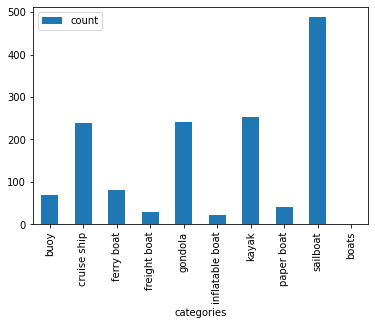

In [22]:
frame.plot(kind='bar')

In [52]:
# It's goddam boring, let's try another approach

## Another automatical approach

In [25]:
ImagePATH = f"images/"
ImagePATH

'images/'

In [30]:
categories = glob(ImagePATH+"*")
categories

['images/buoy',
 'images/cruise ship',
 'images/ferry boat',
 'images/freight boat',
 'images/gondola',
 'images/inflatable boat',
 'images/kayak',
 'images/paper boat',
 'images/sailboat']

In [62]:
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+"/*")
    tempdf = pd.DataFrame({ 'filepath':files, 'category':cat.split("/")[-1] })
    filedf = pd.concat([filedf,tempdf])
filedf.shape

(1462, 2)

In [63]:
filedf.head()

,filepath,category
0,images/buoy/alaska-ocean-warning-light-sea-257...,buoy
1,images/buoy/anchor-warp-rope-buoy-beach-288156...,buoy
2,images/buoy/beach-buoy-w-water-sea-ocean-10428...,buoy
3,images/buoy/beacon-lighthouse-coast-navigation...,buoy
4,images/buoy/blue-boat-buoy-floating-2834157.jpg,buoy


In [46]:
gby_cnt = filedf.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)

In [48]:
px.bar(gby_cnt, x='category', y='cnt', color='category', title='Counts from Each Category')

In [49]:
!mkdir outputs

In [50]:
gby_cnt.to_csv(f"outputs/category_counts.csv", index=None)

## Img exploration

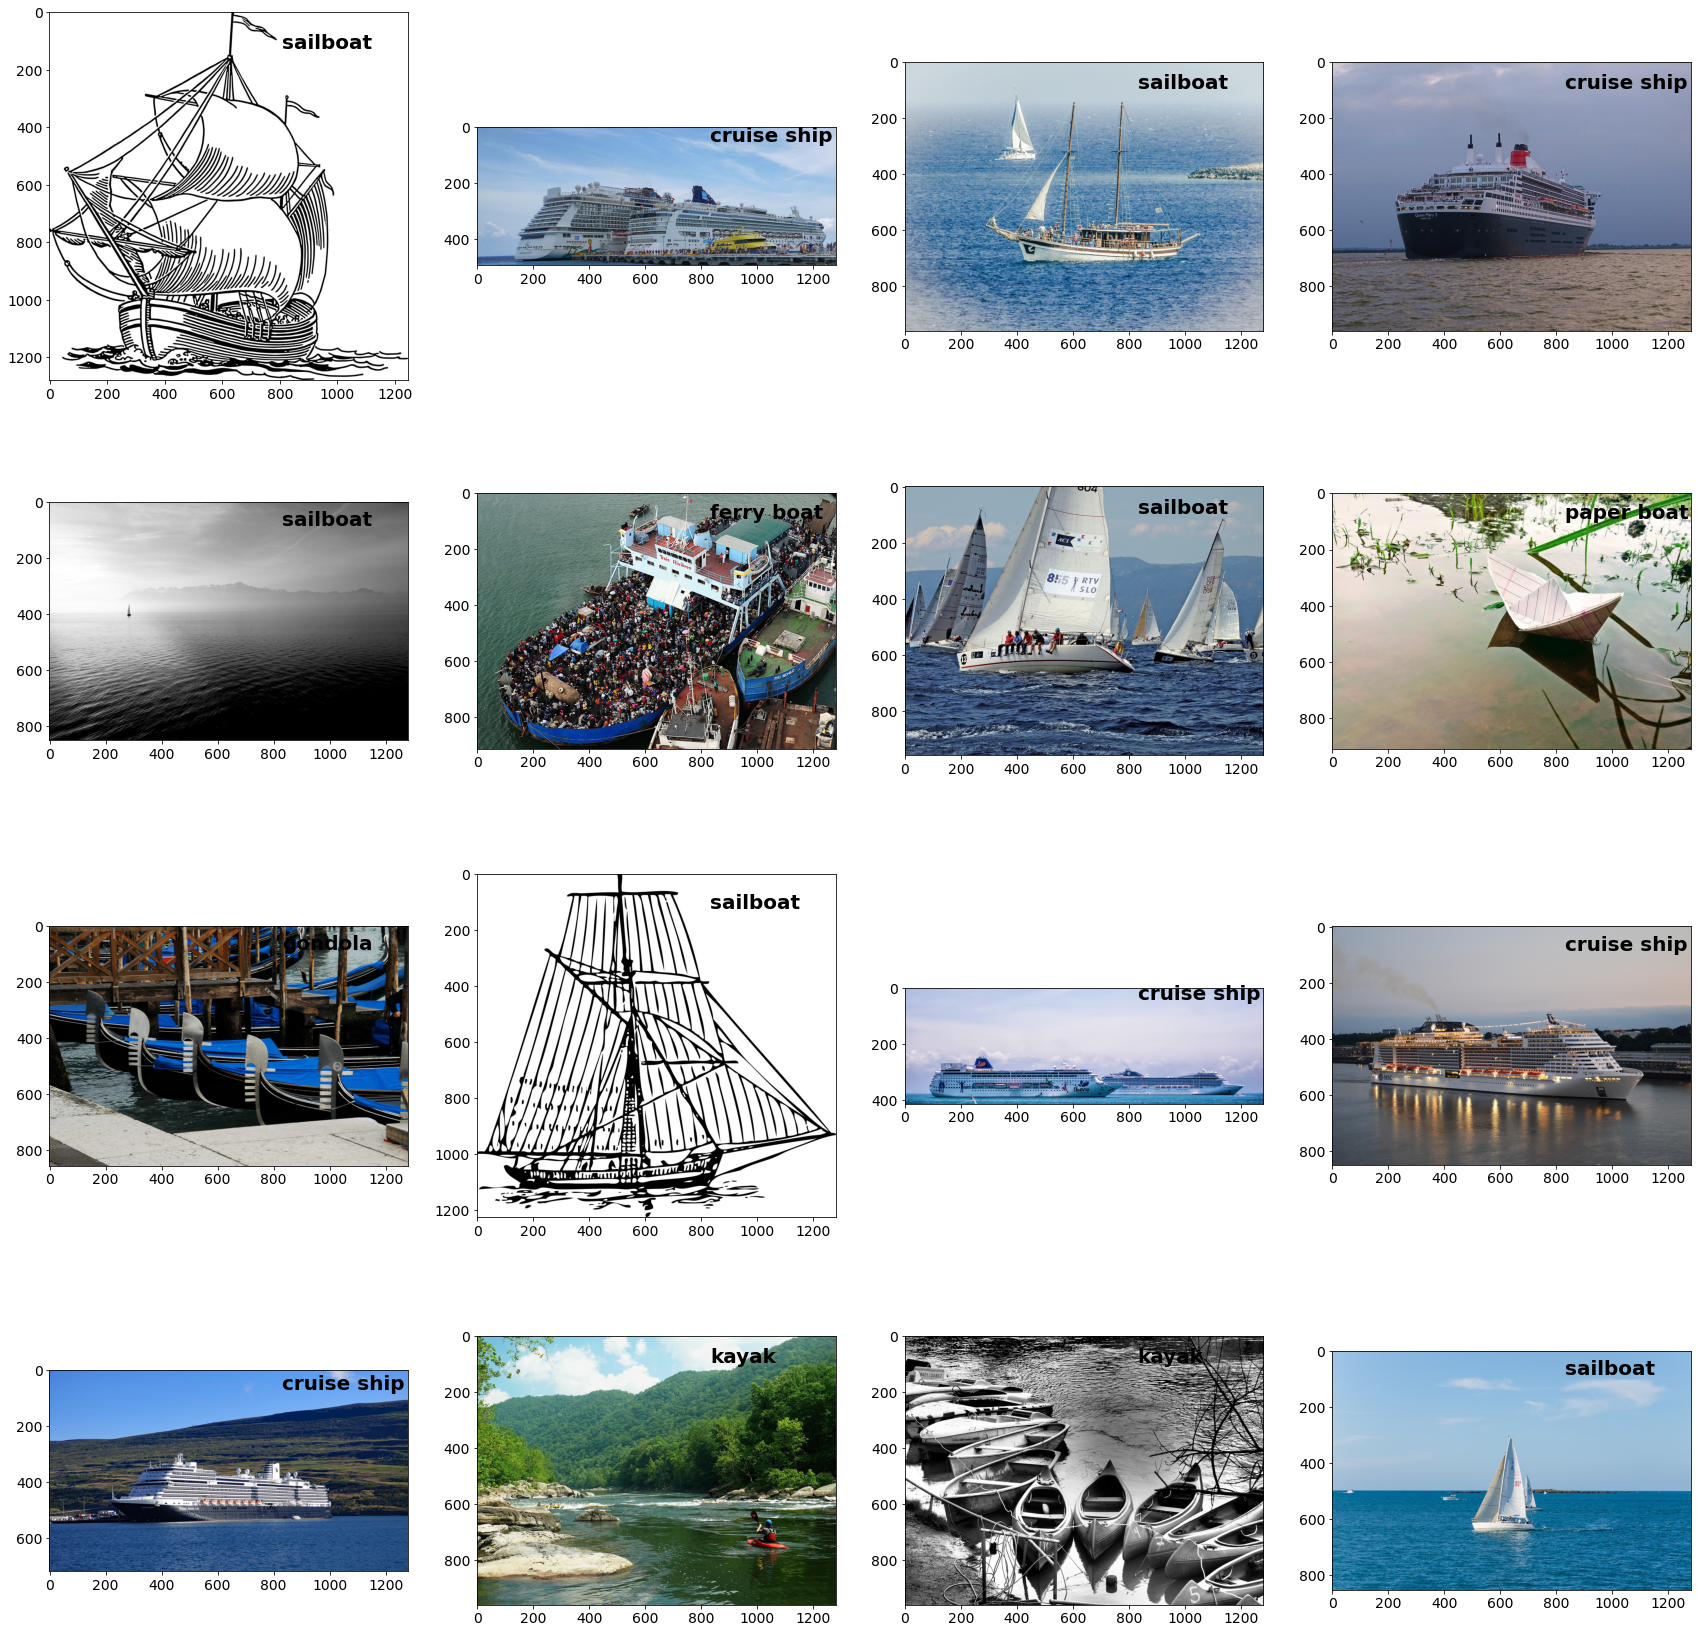

In [51]:
plt.figure(figsize=(24, 24))

for i in range(16):
    path = filedf.sample(1)['filepath'].values[0]
    category = path.split("/")[1]
    ex_img = Image.open(path)
    ax = plt.subplot(4, 4, i + 1)
    ax.annotate(category, xy=(0.65, 0.9), xycoords="axes fraction",weight='bold',size=20)
    ax.imshow(ex_img)

plt.tight_layout()

In [64]:
focus_cats = gby_cnt[gby_cnt['cnt'] >=40]['category'].values

In [65]:
filedf

,filepath,category
0,images/buoy/alaska-ocean-warning-light-sea-257...,buoy
1,images/buoy/anchor-warp-rope-buoy-beach-288156...,buoy
2,images/buoy/beach-buoy-w-water-sea-ocean-10428...,buoy
3,images/buoy/beacon-lighthouse-coast-navigation...,buoy
4,images/buoy/blue-boat-buoy-floating-2834157.jpg,buoy
...,...,...
483,images/sailboat/yachting-competition-sea-yacht...,sailboat
484,images/sailboat/yachting-competition-sea-yacht...,sailboat
485,images/sailboat/yachts-sail-sea-water-boat-tra...,sailboat
486,images/sailboat/yachts-sail-sea-water-boat-tra...,sailboat


In [67]:
filedf = filedf[filedf['category'].isin(focus_cats)]

In [69]:
filedf.category.value_counts()

sailboat       488
kayak          254
gondola        242
cruise ship    239
ferry boat      81
buoy            68
paper boat      40
Name: category, dtype: int64

## Splitting dataset

In [70]:
X_train, X_test, _, _ = train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.4)

X_test, X_val, _, _ = train_test_split(
        X_test, X_test['category'], stratify=X_test['category'], test_size=0.5)

In [74]:
X_train['type'] = 'train'
X_val['type'] = 'val'
X_test['type'] = 'test'

In [77]:
fulldf = pd.concat([X_train, X_test, X_val])
fulldf['type'].value_counts()

train    847
val      283
test     282
Name: type, dtype: int64

In [78]:
fulldf.head()

,filepath,category,type
23,images/cruise ship/clouds-ship-sky-water-vacat...,cruise ship,train
63,images/sailboat/boats-sailing-boat-sailing-boa...,sailboat,train
63,images/ferry boat/on-the-water-lake-ferry-sail...,ferry boat,train
427,images/sailboat/ships-sailing-boat-boat-sailin...,sailboat,train
68,images/cruise ship/cruise-ship-docked-cruise-s...,cruise ship,train


In [80]:
# Moving data to train/test/val folder
!mkdir data
!rm -rf data/
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val

In [81]:
for cat in fulldf.category.unique():
    os.system(f"mkdir data/train/'{cat}'") 
    os.system(f"mkdir data/test/'{cat}'") 
    os.system(f"mkdir data/val/'{cat}'")

In [82]:
fulldf.head()

,filepath,category,type
23,images/cruise ship/clouds-ship-sky-water-vacat...,cruise ship,train
63,images/sailboat/boats-sailing-boat-sailing-boa...,sailboat,train
63,images/ferry boat/on-the-water-lake-ferry-sail...,ferry boat,train
427,images/sailboat/ships-sailing-boat-boat-sailin...,sailboat,train
68,images/cruise ship/cruise-ship-docked-cruise-s...,cruise ship,train


In [84]:
for i,row in fulldf.iterrows():
    # Boat category
    cat = row['category']
    # section is train,val or test
    section = row['type']
    # input filepath to copy
    ipath = row['filepath']
    # output filepath to pastes
    opath = ipath.replace(f"images/",f"data/{section}/")
    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")

In [85]:
fulldf

,filepath,category,type
23,images/cruise ship/clouds-ship-sky-water-vacat...,cruise ship,train
63,images/sailboat/boats-sailing-boat-sailing-boa...,sailboat,train
63,images/ferry boat/on-the-water-lake-ferry-sail...,ferry boat,train
427,images/sailboat/ships-sailing-boat-boat-sailin...,sailboat,train
68,images/cruise ship/cruise-ship-docked-cruise-s...,cruise ship,train
...,...,...,...
253,images/sailboat/sailboat-sailing-sea-ocean-wat...,sailboat,val
33,images/paper boat/pareo-origami-boat-boat-pape...,paper boat,val
190,images/gondola/venice-italy-gondola-channel-28...,gondola,val
344,images/sailboat/sailing-ship-pirate-ship-ship-...,sailboat,val
